In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mahotas as mh
import SimpleITK as sitk
import pandas as pd

In [2]:
# Import output image
output = np.load("C:\\Users\\sindhura\\OneDrive - University of Waterloo\\Queens\\CISC 881\\Challenge Data\\validationOutput\\fold0\\LNDb0001-R1-F1.npy")

In [3]:
refOutput = sitk.ReadImage("C:\\Users\\sindhura\\OneDrive - University of Waterloo\\Queens\\CISC 881\\Challenge Data\\masks\\LNDb-0001_rad1.mhd")

In [6]:
refOutputArray = sitk.GetArrayFromImage(refOutput)

In [7]:
refOutputArray.shape

(328, 512, 512)

TypeError: Invalid shape (167936,) for image data

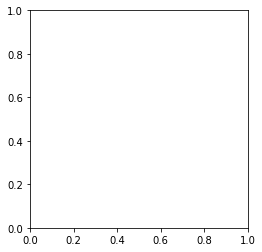

In [8]:
plt.imshow(refOutput[1])

In [22]:
binImg = np.copy(output)


In [12]:
binImg *= 255.0/binImg.max() 

In [13]:
intBinImg = binImg.astype(np.uint8)

In [14]:
otsuThresh = mh.otsu(intBinImg[20])

In [15]:
otsuThresh

64

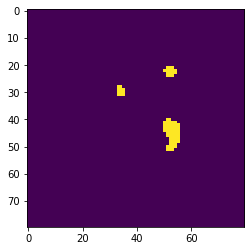

In [16]:
plt.imshow(intBinImg[20] > otsuThresh)

In [17]:
intBinImg[20].max()

217

In [18]:
intBinImg[20] = intBinImg[20] > otsuThresh

In [19]:
intBinImg[20]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
for i in range(intBinImg.shape[2]):
    otsuThreshVal = mh.otsu(intBinImg[i])
    intBinImg[i] = intBinImg[i] > otsuThreshVal

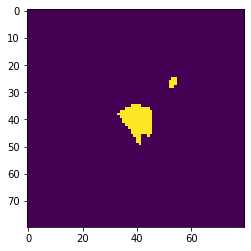

In [23]:
plt.imshow(intBinImg[40])

3


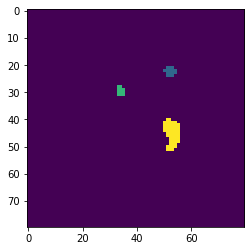

In [25]:
labeled, nNodules = mh.label(intBinImg[20])
print(nNodules)
plt.imshow(labeled)

3


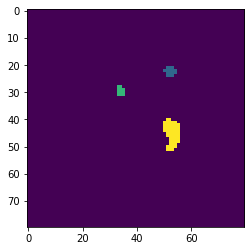

In [30]:
intBinImg[20], nNodules = mh.label(intBinImg[20])
print(nNodules)
plt.imshow(intBinImg[20])

In [53]:
centroid = intBinImg[40,40,40]
centroid

1

In [54]:
segs = np.unique(intBinImg[20])
segs

array([0, 1, 2, 3], dtype=uint8)

In [55]:
intBinImg[20][intBinImg[20] == 2] = 0

In [56]:
np.unique(intBinImg[20])

array([0, 1, 3], dtype=uint8)

In [59]:
range(len(segs))

range(0, 4)

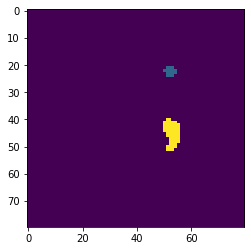

In [60]:
plt.imshow(intBinImg[20])

In [ ]:
    for i in range(80):
        nNods = np.unique(intBinImg[i])    # Get number of total nodules in segmentation
        for j in range(len(nNods)):
            if j != centroidSeg:
                labeledSeg[i][labeledSeg[i] == j] = 0